# Problem Definition

**Titanic Survival Prediction:**

Use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

**Variables and Their Types:**

Survival: Survival -> 0 = No, 1 = Yes

Pclass: Ticket class -> 1 = 1st, 2 = 2nd, 3 = 3rd

Sex: Sex

Age: Age in years

SibSp: # of siblings / spouses aboard the Titanic

Parch: # of parents / children aboard the Titanic

Ticket: Ticket number

Fare: Passenger fare

Cabin: Cabin number

Embarked: Port of Embarkation -> C = Cherbourg, Q = Queenstown, S = Southampton

**Variable Notes:**

Pclass: A proxy for socio-economic status (SES)
- 1st = Upper
- 2nd = Middle
- 3rd = Lower

Age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

SibSp: The dataset defines family relations in this way...
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)

Parch: The dataset defines family relations in this way...
- Parent = mother, father
- Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

# Data Understanding (Exploratory Data Analysis)

## Importing Librarires

**numpy:** A fundamental package for scientific computing with Python

**pandas:** An open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for Python

**matplotlib:** A Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms

**seaborn:** A Python data visualization library based on matplotlib; it provides a high-level interface for drawing attractive and informative statistical graphics

In [275]:
# data analysis libraries:
import numpy as np
import pandas as pd

# data visualization libraries:
import matplotlib.pyplot as plt
import seaborn as sns

# to ignore warnings:
import warnings
warnings.filterwarnings('ignore')

# to display all columns:
pd.set_option('display.max_columns', None)

from sklearn.model_selection import train_test_split, GridSearchCV

## Loading Data

In [276]:
# Read train and test data with pd.read_csv():

train_data = pd.read_csv("./data/titanic/train.csv")
test_data = pd.read_csv("./data/titanic/test.csv")

In [277]:
# copy data in order to avoid any change in the original:

train = train_data.copy()
test = test_data.copy()

## First Looking at Data

In [278]:
# Look at first few lines with head():

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [279]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [280]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [281]:
# Convert some data types into categorical:

train.Pclass = pd.Categorical(train.Pclass)
train.Name = pd.Categorical(train.Name)
train.Sex = pd.Categorical(train.Sex)
train.SibSp = pd.Categorical(train.SibSp)
train.Parch = pd.Categorical(train.Parch)
train.Ticket = pd.Categorical(train.Ticket)
train.Cabin = pd.Categorical(train.Cabin)
train.Embarked = pd.Categorical(train.Embarked)

test.Pclass = pd.Categorical(test.Pclass)
test.Name = pd.Categorical(test.Name)
test.Sex = pd.Categorical(test.Sex)
test.SibSp = pd.Categorical(test.SibSp)
test.Parch = pd.Categorical(test.Parch)
test.Ticket = pd.Categorical(test.Ticket)
test.Cabin = pd.Categorical(test.Cabin)
test.Embarked = pd.Categorical(test.Embarked)

In [282]:
train.dtypes

PassengerId       int64
Survived          int64
Pclass         category
Name           category
Sex            category
Age             float64
SibSp          category
Parch          category
Ticket         category
Fare            float64
Cabin          category
Embarked       category
dtype: object

In [283]:
test.dtypes

PassengerId       int64
Pclass         category
Name           category
Sex            category
Age             float64
SibSp          category
Parch          category
Ticket         category
Fare            float64
Cabin          category
Embarked       category
dtype: object

**Numerical features:** Age (Continuous), Fare (Continuous), SibSp (Discrete), Parch (Discrete)

**Categorical features:** Survived, Sex, Embarked, Pclass

**Alphanumeric features:** Ticket, Cabin

In [284]:
# Structural information about the data:

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null category
Name           891 non-null category
Sex            891 non-null category
Age            714 non-null float64
SibSp          891 non-null category
Parch          891 non-null category
Ticket         891 non-null category
Fare           891 non-null float64
Cabin          204 non-null category
Embarked       889 non-null category
dtypes: category(8), float64(2), int64(2)
memory usage: 117.0 KB


**Comments:**

There are 891 passengers totally in the training set.

The Age feature is missing approximately 19.8%

The Cabin feature is missing approximately 77.1%

The Embarked feature is missing 0.22%

## Checking of Missing Values and Basic Treatments

In [285]:
# Structural information about the data:

train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [286]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Analysis and Visualization of Numeric and Categorical Variables

### Basic summary statistics about the numerical data

In [287]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


### Classes of some categorical variables

In [288]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [289]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [290]:
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [291]:
train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [292]:
train['Ticket'].value_counts()

CA. 2343    7
1601        7
347082      7
347088      6
CA 2144     6
           ..
PC 17601    1
349239      1
349240      1
349241      1
347464      1
Name: Ticket, Length: 681, dtype: int64

In [293]:
train['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
F2             3
C22 C26        3
              ..
D19            1
D21            1
D28            1
D30            1
A10            1
Name: Cabin, Length: 147, dtype: int64

In [294]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

### Visualization

In general, barplot is used for categorical variables while histogram, density and boxplot are used for numerical data.

#### Pclass vs survived:

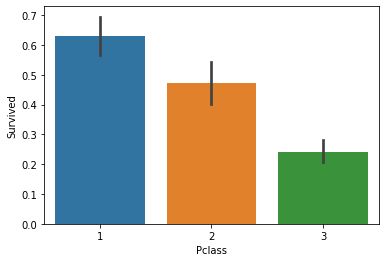

In [295]:
sns.barplot(x = 'Pclass', y = 'Survived', data = train);

In [296]:
print("Percentage of Pclass1 survived:",  train["Survived"][train["Pclass"] == 1].value_counts(normalize=True)[1]*100)
print("Percentage of Pclass2 survived:",  train["Survived"][train["Pclass"] == 2].value_counts(normalize=True)[1]*100)
print("Percentage of Pclass3 survived:",  train["Survived"][train["Pclass"] == 3].value_counts(normalize=True)[1]*100)

Percentage of Pclass1 survived: 62.96296296296296
Percentage of Pclass2 survived: 47.28260869565217
Percentage of Pclass3 survived: 24.236252545824847


#### Age vs survived:

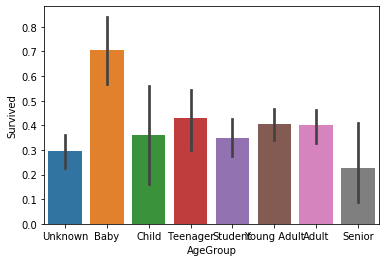

In [297]:
#sort the ages into logical categories

train["Age_new"] = train["Age"].fillna(-0.5)
test["Age_new"] = test["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
mylabels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train["Age_new"], bins, labels = mylabels)
test['AgeGroup'] = pd.cut(test["Age_new"], bins, labels = mylabels)

train.AgeGroup = pd.Categorical(train.AgeGroup)
test.AgeGroup = pd.Categorical(test.AgeGroup)

#draw a bar plot of Age vs. survival
sns.barplot(x="AgeGroup", y="Survived", data=train);

In [298]:
train.pivot_table('Survived', index = 'Sex', columns = 'AgeGroup')

AgeGroup,Unknown,Baby,Child,Teenager,Student,Young Adult,Adult,Senior
Sex,,,,,,,,
female,0.679245,0.761905,0.272727,0.750000,0.795918,0.774648,0.771429,1.000000
male,0.129032,0.652174,0.428571,0.088235,0.101124,0.228188,0.192000,0.105263


#### SibSp vs survived:

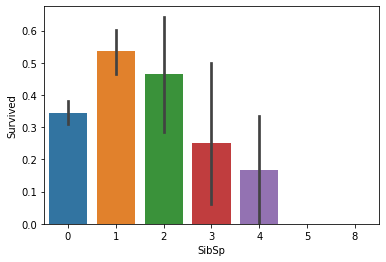

In [299]:
sns.barplot(x = 'SibSp', y = 'Survived', data = train);

In [300]:
print("Percentage of SibSp = 0 who survived:", train["Survived"][train["SibSp"] == 0].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 1 who survived:", train["Survived"][train["SibSp"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 2 who survived:", train["Survived"][train["SibSp"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 3 who survived:", train["Survived"][train["SibSp"] == 3].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 4 who survived:", train["Survived"][train["SibSp"] == 4].value_counts(normalize = True)[1]*100)

Percentage of SibSp = 0 who survived: 34.53947368421053
Percentage of SibSp = 1 who survived: 53.588516746411486
Percentage of SibSp = 2 who survived: 46.42857142857143
Percentage of SibSp = 3 who survived: 25.0
Percentage of SibSp = 4 who survived: 16.666666666666664


#### Parch vs survived:

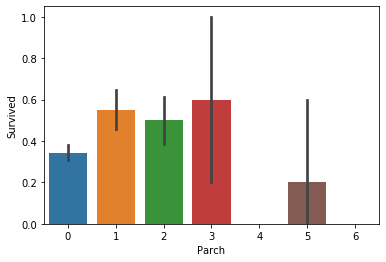

In [301]:
sns.barplot(x = 'Parch', y = 'Survived', data = train);

#### Sex vs survived:

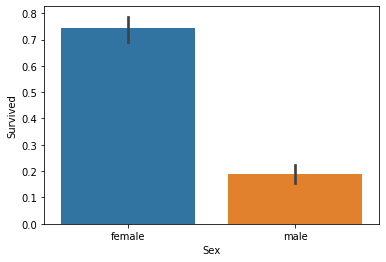

In [302]:
sns.barplot(x = 'Sex', y = 'Survived', data = train);

In [303]:
print("Percentage of female survived:",  train["Survived"][train["Sex"] == "female"].value_counts(normalize=True)[1]*100)
print("Percentage of male survived:",  train["Survived"][train["Sex"] == "male"].value_counts(normalize=True)[1]*100)

Percentage of female survived: 74.20382165605095
Percentage of male survived: 18.890814558058924


Look at age groups:

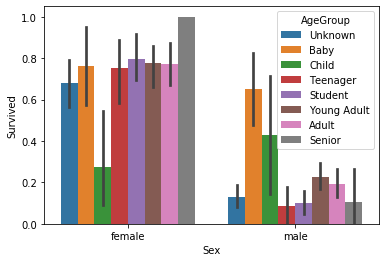

In [304]:
sns.barplot(x = 'Sex', y = 'Survived', hue = 'AgeGroup', data = train);

## Report based on visual data

* People with higher socioeconomic class had a higher rate of survival.

* Babies were more likely to survive than any other age group.

* People with more siblings or spouses aboard were less likely to survive. However, contrary to expectations, people with no siblings or spouses were less likely to survive than those with one or two.

* People with less than four parents or children aboard were more likely to survive than those with four or more. People traveling alone were less likely to survive than those with 1-3 parents or children.

* Females had a much higher chance of survival than males.

# Data Preparation

## Deleting Unnecessary Variables

In [306]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_new,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,Young Adult


In [307]:
train.dtypes

PassengerId       int64
Survived          int64
Pclass         category
Name           category
Sex            category
Age             float64
SibSp          category
Parch          category
Ticket         category
Fare            float64
Cabin          category
Embarked       category
Age_new         float64
AgeGroup       category
dtype: object

**transform sex into numerical data**

**drop cabin, ticket, name, age variables**

### Ticket

In [308]:
# We can drop the Ticket feature since it is unlikely to have useful information

train = train.drop(['Ticket'], axis = 1)
test = test.drop(['Ticket'], axis = 1)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_new,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,22.0,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,38.0,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,26.0,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,35.0,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,35.0,Young Adult


### Age_new

In [309]:
# Age_new was created for creating AgeGroup; unknowns were -0.5. We can delete now.

train = train.drop(['Age_new'], axis = 1)
test = test.drop(['Age_new'], axis = 1)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,Young Adult


## Outlier Treatment

In [310]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


Fare max datasında bir anormallik var gibi. Bu numerik datayı boxplot ile görselleştir.

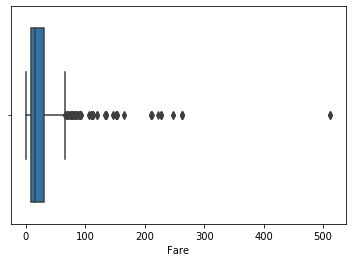

In [311]:
# It looks like there is a problem in Fare max data. Visualize with boxplot.

sns.boxplot(x = train['Fare']);

In [312]:
Q1 = train['Fare'].quantile(0.25)
Q3 = train['Fare'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1- 1.5*IQR
lower_limit

upper_limit = Q3 + 1.5*IQR
upper_limit

65.6344

In [313]:
# observations with Fare data higher than the upper limit:

train['Fare'] > (upper_limit)

0      False
1       True
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Fare, Length: 891, dtype: bool

In [314]:
outlier_tf = train['Fare'] > (upper_limit)

In [315]:
train["Fare"][train['Fare'] > (upper_limit)]

1       71.2833
27     263.0000
31     146.5208
34      82.1708
52      76.7292
         ...   
846     69.5500
849     89.1042
856    164.8667
863     69.5500
879     83.1583
Name: Fare, Length: 116, dtype: float64

In [316]:
outliers = train['Fare'][outlier_tf]
outliers.index


Int64Index([  1,  27,  31,  34,  52,  61,  62,  72,  88, 102,
            ...
            792, 802, 820, 829, 835, 846, 849, 856, 863, 879],
           dtype='int64', length=116)

In [317]:
train.sort_values("Fare", ascending=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,AgeGroup
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,512.3292,NaN,C,Young Adult
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,512.3292,B101,C,Young Adult
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,512.3292,B51 B53 B55,C,Adult
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,263.0000,C23 C25 C27,S,Student
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,263.0000,C23 C25 C27,S,Student
...,...,...,...,...,...,...,...,...,...,...,...,...
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,0.0000,NaN,S,Unknown
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,0.0000,NaN,S,Unknown
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,0.0000,NaN,S,Adult
732,733,0,2,"Knight, Mr. Robert J",male,NaN,0,0,0.0000,NaN,S,Unknown


In [318]:
# In boxplot, there are too many data higher than upper limit; we can not change all. Just repress the highest value -512- 

train['Fare'] = train['Fare'].replace(512.3292, 300)

In [319]:
train.sort_values("Fare", ascending=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,AgeGroup
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,300.0,NaN,C,Young Adult
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,300.0,B101,C,Young Adult
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,300.0,B51 B53 B55,C,Adult
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,263.0,C23 C25 C27,S,Student
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,263.0,C23 C25 C27,S,Student
...,...,...,...,...,...,...,...,...,...,...,...,...
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,0.0,NaN,S,Unknown
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,0.0,NaN,S,Unknown
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,0.0,NaN,S,Adult
732,733,0,2,"Knight, Mr. Robert J",male,NaN,0,0,0.0,NaN,S,Unknown


In [320]:
test.sort_values("Fare", ascending=False)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,AgeGroup
343,1235,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,512.3292,B51 B53 B55,C,Adult
53,945,1,"Fortune, Miss. Ethel Flora",female,28.0,3,2,263.0000,C23 C25 C27,S,Young Adult
69,961,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.0,1,4,263.0000,C23 C25 C27,S,Adult
24,916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,262.3750,B57 B59 B63 B66,C,Adult
142,1034,1,"Ryerson, Mr. Arthur Larned",male,61.0,1,3,262.3750,B57 B59 B63 B66,C,Senior
...,...,...,...,...,...,...,...,...,...,...,...
133,1025,3,"Thomas, Mr. Charles P",male,NaN,1,0,6.4375,NaN,C,Unknown
21,913,3,"Olsen, Master. Artur Karl",male,9.0,0,1,3.1708,NaN,S,Child
266,1158,1,"Chisholm, Mr. Roderick Robert Crispin",male,NaN,0,0,0.0000,NaN,S,Unknown
372,1264,1,"Ismay, Mr. Joseph Bruce",male,49.0,0,0,0.0000,B52 B54 B56,S,Adult


In [321]:
test['Fare'] = test['Fare'].replace(512.3292, 300)

In [322]:
test.sort_values("Fare", ascending=False)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,AgeGroup
343,1235,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,300.0000,B51 B53 B55,C,Adult
53,945,1,"Fortune, Miss. Ethel Flora",female,28.0,3,2,263.0000,C23 C25 C27,S,Young Adult
69,961,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.0,1,4,263.0000,C23 C25 C27,S,Adult
24,916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,262.3750,B57 B59 B63 B66,C,Adult
142,1034,1,"Ryerson, Mr. Arthur Larned",male,61.0,1,3,262.3750,B57 B59 B63 B66,C,Senior
...,...,...,...,...,...,...,...,...,...,...,...
133,1025,3,"Thomas, Mr. Charles P",male,NaN,1,0,6.4375,NaN,C,Unknown
21,913,3,"Olsen, Master. Artur Karl",male,9.0,0,1,3.1708,NaN,S,Child
266,1158,1,"Chisholm, Mr. Roderick Robert Crispin",male,NaN,0,0,0.0000,NaN,S,Unknown
372,1264,1,"Ismay, Mr. Joseph Bruce",male,49.0,0,0,0.0000,B52 B54 B56,S,Adult


## Missing Value Treatment

### Age

Age'i doldurmak için title'lar kullanılacak. Title'ları cogaltmak için combine train and test data:

In [323]:
# Use titles to fill missing Age value. Combine train and test data:

combine = [train, test]
combine = pd.concat(combine, ignore_index = True)
combine.head()

,Age,AgeGroup,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived
0,22.0,Student,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0
1,38.0,Adult,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0
2,26.0,Young Adult,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0
3,35.0,Young Adult,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0
4,35.0,Young Adult,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0


In [324]:
# Missing values in combine:

combine.isnull().sum()

Age             263
AgeGroup          0
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
dtype: int64

In [325]:
# Create Title variable in combine; take titles from Name data:

combine["Title"] = combine["Name"].str.extract(' ([A-Za-z]+)\.', expand=False)

combine.head()

,Age,AgeGroup,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Title
0,22.0,Student,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,Mr
1,38.0,Adult,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,Mrs
2,26.0,Young Adult,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,Miss
3,35.0,Young Adult,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,Mrs
4,35.0,Young Adult,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,Mr


combine içinden title, age ve survived değişkenlerini seç, groupby ile title'lara göre grupla, aggregate ile farklı değişkenlere farklı fonksiyonlar uygula:

In [326]:
combine[["Title","Age","Survived"]].groupby("Title").aggregate({"Age":["count","mean","median","std"], 
                                                                "Survived": "mean"})

Age                               Survived
         count       mean median        std      mean
Title                                                
Capt         1  70.000000   70.0        NaN  0.000000
Col          4  54.000000   54.5   5.477226  0.500000
Countess     1  33.000000   33.0        NaN  1.000000
Don          1  40.000000   40.0        NaN  0.000000
Dona         1  39.000000   39.0        NaN       NaN
Dr           7  43.571429   49.0  11.731115  0.428571
Jonkheer     1  38.000000   38.0        NaN  0.000000
Lady         1  48.000000   48.0        NaN  1.000000
Major        2  48.500000   48.5   4.949747  0.500000
Master      53   5.482642    4.0   4.161554  0.575000
Miss       210  21.774238   22.0  12.249077  0.697802
Mlle         2  24.000000   24.0   0.000000  1.000000
Mme          1  24.000000   24.0        NaN  1.000000
Mr         581  32.252151   29.0  12.422089  0.156673
Mrs        170  36.994118   35.5  12.901767  0.792000
Ms           1  28.000000   28.0        NaN  1.000000
Rev          8  41.250000   41.5  12.020815  0.000000
Sir          1  49.000000   49.0        NaN  1.000000

In [327]:
combine[(combine["Age"].isnull()) & (combine["Title"] == "Master")]

,Age,AgeGroup,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Title
65,NaN,Unknown,NaN,C,15.2458,"Moubarek, Master. Gerios",1,66,3,male,1,1.0,Master
159,NaN,Unknown,NaN,S,69.5500,"Sage, Master. Thomas Henry",2,160,3,male,8,0.0,Master
176,NaN,Unknown,NaN,S,25.4667,"Lefebre, Master. Henry Forbes",1,177,3,male,3,0.0,Master
709,NaN,Unknown,NaN,C,15.2458,"Moubarek, Master. Halim Gonios (""William George"")",1,710,3,male,1,1.0,Master
1135,NaN,Unknown,NaN,S,23.4500,"Johnston, Master. William Arthur Willie""""",2,1136,3,male,1,NaN,Master
1230,NaN,Unknown,NaN,C,7.2292,"Betros, Master. Seman",0,1231,3,male,0,NaN,Master
1235,NaN,Unknown,NaN,S,14.5000,"van Billiard, Master. James William",1,1236,3,male,1,NaN,Master
1308,NaN,Unknown,NaN,C,22.3583,"Peter, Master. Michael J",1,1309,3,male,1,NaN,Master


In [328]:
combine[["Title","Age","Survived"]].groupby("Title").agg({"Age":["count","mean","median","std", lambda x: x.isnull().sum()], 
                                                                "Survived": "mean"})

Age                                          Survived
         count       mean median        std <lambda_0>      mean
Title                                                           
Capt         1  70.000000   70.0        NaN        0.0  0.000000
Col          4  54.000000   54.5   5.477226        0.0  0.500000
Countess     1  33.000000   33.0        NaN        0.0  1.000000
Don          1  40.000000   40.0        NaN        0.0  0.000000
Dona         1  39.000000   39.0        NaN        0.0       NaN
Dr           7  43.571429   49.0  11.731115        1.0  0.428571
Jonkheer     1  38.000000   38.0        NaN        0.0  0.000000
Lady         1  48.000000   48.0        NaN        0.0  1.000000
Major        2  48.500000   48.5   4.949747        0.0  0.500000
Master      53   5.482642    4.0   4.161554        8.0  0.575000
Miss       210  21.774238   22.0  12.249077       50.0  0.697802
Mlle         2  24.000000   24.0   0.000000        0.0  1.000000
Mme          1  24.000000   24.0        NaN        0.0  1.000000
Mr         581  32.252151   29.0  12.422089      176.0  0.156673
Mrs        170  36.994118   35.5  12.901767       27.0  0.792000
Ms           1  28.000000   28.0        NaN        1.0  1.000000
Rev          8  41.250000   41.5  12.020815        0.0  0.000000
Sir          1  49.000000   49.0        NaN        0.0  1.000000

**Note:** You can use agg or apply for isnull but agg can use different functions for different columns.

In [329]:
combine[["Title","Age"]].groupby('Title').agg({'Age': lambda x: x.isnull().sum()})

,Age
Title,
Capt,0.0
Col,0.0
Countess,0.0
Don,0.0
Dona,0.0
Dr,1.0
Jonkheer,0.0
Lady,0.0
Major,0.0


In [330]:
combine[["Title","Age"]].groupby('Title').apply(lambda x: x.isnull().sum())

,Title,Age
Title,,
Capt,0,0
Col,0,0
Countess,0,0
Don,0,0
Dona,0,0
Dr,0,1
Jonkheer,0,0
Lady,0,0
Major,0,0


In [331]:
combine["Age"].isnull().sum()

263

In [332]:
# Each missing value in Age according to titles will be filled with its own average value:

combine["Age"] = combine[["Title","Age"]].groupby("Title").transform(lambda x: x.fillna(x.mean()))

combine.head(10)

,Age,AgeGroup,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Title
0,22.000000,Student,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,Mr
1,38.000000,Adult,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,Mrs
2,26.000000,Young Adult,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,Miss
3,35.000000,Young Adult,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,Mrs
4,35.000000,Young Adult,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,Mr
5,32.252151,Unknown,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,Mr
6,54.000000,Adult,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,Mr
7,2.000000,Baby,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,Master
8,27.000000,Young Adult,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,Mrs
9,14.000000,Teenager,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,Mrs


In [333]:
combine["Age"].isnull().sum()

0

In [334]:
# First 891 rows according to PassengerId were in the train data while others were in the test data

train["Age"] = pd.DataFrame(combine["Age"][0:891])

In [335]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,7.2500,NaN,S,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,7.9250,NaN,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,53.1000,C123,S,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,8.0500,NaN,S,Young Adult
5,6,0,3,"Moran, Mr. James",male,32.252151,0,0,8.4583,NaN,Q,Unknown
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,51.8625,E46,S,Adult
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,21.0750,NaN,S,Baby
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,11.1333,NaN,S,Young Adult
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,30.0708,NaN,C,Teenager


In [336]:
test["Age"] = pd.DataFrame(combine["Age"][891:len(combine)]).values

In [337]:
test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,AgeGroup
413,1305,3,"Spector, Mr. Woolf",male,32.252151,0,0,8.0500,NaN,S,Unknown
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,108.9000,C105,C,Adult
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,7.2500,NaN,S,Adult
416,1308,3,"Ware, Mr. Frederick",male,32.252151,0,0,8.0500,NaN,S,Unknown
417,1309,3,"Peter, Master. Michael J",male,5.482642,1,1,22.3583,NaN,C,Unknown


In [338]:
train["Age"].isnull().sum()

0

In [339]:
test["Age"].isnull().sum()

0

In [340]:
# Assign again to AgeGroup:

bins = [0, 5, 12, 18, 24, 35, 60, np.inf]
mylabels = ['Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train["Age"], bins, labels = mylabels)
test['AgeGroup'] = pd.cut(test["Age"], bins, labels = mylabels)

#train.AgeGroup = pd.Categorical(train.AgeGroup)
#test.AgeGroup = pd.Categorical(test.AgeGroup)

In [341]:
train["Age"].isnull().sum()

0

In [342]:
test["Age"].isnull().sum()

0

In [343]:
train["AgeGroup"].isnull().sum()

0

In [344]:
test["AgeGroup"].isnull().sum()

0

### Embarked

In [345]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
AgeGroup         0
dtype: int64

In [346]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             1
Cabin          327
Embarked         0
AgeGroup         0
dtype: int64

In [347]:
# Fill NA with the most frequent value:

train = train.fillna({"Embarked": "S"})

### Fare

In [348]:
test[test["Fare"].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,AgeGroup
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,NaN,NaN,S,Senior


In [349]:
test[["Pclass","Fare"]].groupby("Pclass").mean()

,Fare
Pclass,
1,92.295912
2,22.202104
3,12.459678


In [350]:
test["Fare"] = test["Fare"].fillna(12)

In [351]:
test["Fare"].isnull().sum()

0

### Cabin

In [352]:
# Create CabinBool variable which states if someone has a Cabin data or not:

train["CabinBool"] = (train["Cabin"].notnull().astype('int'))
test["CabinBool"] = (test["Cabin"].notnull().astype('int'))

train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Student,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adult,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Young Adult,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Young Adult,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Young Adult,0


## Variable Transformation

### Embarked

In [353]:
# Map each Embarked value to a numerical value:

embarked_mapping = {"S": 1, "C": 2, "Q": 3}

train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)

In [354]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,1,Student,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,2,Adult,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,1,Young Adult,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,1,Young Adult,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,1,Young Adult,0


### Sex

In [355]:
# Convert Sex values into 1-0:

from sklearn import preprocessing

lbe = preprocessing.LabelEncoder()
train["Sex"] = lbe.fit_transform(train["Sex"])
test["Sex"] = lbe.fit_transform(test["Sex"])

In [356]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,1,Student,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,2,Adult,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,1,Young Adult,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,1,Young Adult,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,1,Young Adult,0


### Name - Title

In [357]:
train["Title"] = train["Name"].str.extract(' ([A-Za-z]+)\.', expand=False)
test["Title"] = test["Name"].str.extract(' ([A-Za-z]+)\.', expand=False)

In [358]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,1,Student,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,2,Adult,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,1,Young Adult,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,1,Young Adult,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,1,Young Adult,0,Mr


In [359]:
train['Title'] = train['Title'].replace(['Lady', 'Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
train['Title'] = train['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
train['Title'] = train['Title'].replace('Mlle', 'Miss')
train['Title'] = train['Title'].replace('Ms', 'Miss')
train['Title'] = train['Title'].replace('Mme', 'Mrs')

In [360]:
test['Title'] = test['Title'].replace(['Lady', 'Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
test['Title'] = test['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
test['Title'] = test['Title'].replace('Mlle', 'Miss')
test['Title'] = test['Title'].replace('Ms', 'Miss')
test['Title'] = test['Title'].replace('Mme', 'Mrs')

In [361]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,1,Student,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,2,Adult,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,1,Young Adult,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,1,Young Adult,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,1,Young Adult,0,Mr


In [362]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,892,3,"Kelly, Mr. James",1,34.5,0,0,7.8292,3,Young Adult,0,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,7.0000,1,Adult,0,Mrs
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,9.6875,3,Senior,0,Mr
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,8.6625,1,Young Adult,0,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,12.2875,1,Student,0,Mrs


In [363]:
train[["Title","PassengerId"]].groupby("Title").count()

,PassengerId
Title,
Master,40
Miss,185
Mr,517
Mrs,126
Rare,21
Royal,2


In [364]:
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [365]:
# Map each of the title groups to a numerical value

title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}

train['Title'] = train['Title'].map(title_mapping)

In [366]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
AgeGroup       0
CabinBool      0
Title          0
dtype: int64

In [367]:
test['Title'] = test['Title'].map(title_mapping)

In [368]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,892,3,"Kelly, Mr. James",1,34.5,0,0,7.8292,3,Young Adult,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,7.0000,1,Adult,0,3
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,9.6875,3,Senior,0,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,8.6625,1,Young Adult,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,12.2875,1,Student,0,3


In [369]:
train = train.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)

In [370]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,1,22.0,1,0,7.2500,1,Student,0,1
1,2,1,1,0,38.0,1,0,71.2833,2,Adult,1,3
2,3,1,3,0,26.0,0,0,7.9250,1,Young Adult,0,2
3,4,1,1,0,35.0,1,0,53.1000,1,Young Adult,1,3
4,5,0,3,1,35.0,0,0,8.0500,1,Young Adult,0,1


### AgeGroup

In [371]:
# Map each Age value to a numerical value:

age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
train['AgeGroup'] = train['AgeGroup'].map(age_mapping)
test['AgeGroup'] = test['AgeGroup'].map(age_mapping)

In [372]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,1,22.0,1,0,7.2500,1,4,0,1
1,2,1,1,0,38.0,1,0,71.2833,2,6,1,3
2,3,1,3,0,26.0,0,0,7.9250,1,5,0,2
3,4,1,1,0,35.0,1,0,53.1000,1,5,1,3
4,5,0,3,1,35.0,0,0,8.0500,1,5,0,1


In [373]:
#dropping the Age feature for now, might change:

train = train.drop(['Age'], axis = 1)
test = test.drop(['Age'], axis = 1)

In [374]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,1,1,0,7.2500,1,4,0,1
1,2,1,1,0,1,0,71.2833,2,6,1,3
2,3,1,3,0,0,0,7.9250,1,5,0,2
3,4,1,1,0,1,0,53.1000,1,5,1,3
4,5,0,3,1,0,0,8.0500,1,5,0,1


### Fare

In [375]:
# Map Fare values into groups of numerical values:

train['FareBand'] = pd.qcut(train['Fare'], 4, labels = [1, 2, 3, 4])
test['FareBand'] = pd.qcut(test['Fare'], 4, labels = [1, 2, 3, 4])

In [376]:
# Drop Fare values:

train = train.drop(['Fare'], axis = 1)
test = test.drop(['Fare'], axis = 1)

In [377]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title,FareBand
0,1,0,3,1,1,0,1,4,0,1,1
1,2,1,1,0,1,0,2,6,1,3,4
2,3,1,3,0,0,0,1,5,0,2,2
3,4,1,1,0,1,0,1,5,1,3,4
4,5,0,3,1,0,0,1,5,0,1,2


## Feature Engineering

### Family Size

In [378]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title,FareBand
0,1,0,3,1,1,0,1,4,0,1,1
1,2,1,1,0,1,0,2,6,1,3,4
2,3,1,3,0,0,0,1,5,0,2,2
3,4,1,1,0,1,0,1,5,1,3,4
4,5,0,3,1,0,0,1,5,0,1,2


In [379]:
train["FamilySize"] = train_data["SibSp"] + train_data["Parch"] + 1

In [380]:
test["FamilySize"] = test_data["SibSp"] + test_data["Parch"] + 1

In [381]:
# Create new feature of family size:

train['Single'] = train['FamilySize'].map(lambda s: 1 if s == 1 else 0)
train['SmallFam'] = train['FamilySize'].map(lambda s: 1 if  s == 2  else 0)
train['MedFam'] = train['FamilySize'].map(lambda s: 1 if 3 <= s <= 4 else 0)
train['LargeFam'] = train['FamilySize'].map(lambda s: 1 if s >= 5 else 0)

In [382]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title,FareBand,FamilySize,Single,SmallFam,MedFam,LargeFam
0,1,0,3,1,1,0,1,4,0,1,1,2,0,1,0,0
1,2,1,1,0,1,0,2,6,1,3,4,2,0,1,0,0
2,3,1,3,0,0,0,1,5,0,2,2,1,1,0,0,0
3,4,1,1,0,1,0,1,5,1,3,4,2,0,1,0,0
4,5,0,3,1,0,0,1,5,0,1,2,1,1,0,0,0


In [383]:
# Create new feature of family size:

test['Single'] = test['FamilySize'].map(lambda s: 1 if s == 1 else 0)
test['SmallFam'] = test['FamilySize'].map(lambda s: 1 if  s == 2  else 0)
test['MedFam'] = test['FamilySize'].map(lambda s: 1 if 3 <= s <= 4 else 0)
test['LargeFam'] = test['FamilySize'].map(lambda s: 1 if s >= 5 else 0)

In [384]:
test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title,FareBand,FamilySize,Single,SmallFam,MedFam,LargeFam
0,892,3,1,0,0,3,5,0,1,1,1,1,0,0,0
1,893,3,0,1,0,1,6,0,3,1,2,0,1,0,0
2,894,2,1,0,0,3,7,0,1,2,1,1,0,0,0
3,895,3,1,0,0,1,5,0,1,2,1,1,0,0,0
4,896,3,0,1,1,1,4,0,3,2,3,0,0,1,0


### Embarked & Title

In [385]:
# Convert Title and Embarked into indicator values:

train = pd.get_dummies(train, columns = ["Title"])
train = pd.get_dummies(train, columns = ["Embarked"], prefix="Em")

In [386]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,AgeGroup,CabinBool,FareBand,FamilySize,Single,SmallFam,MedFam,LargeFam,Title_1,Title_2,Title_3,Title_4,Title_5,Title_6,Em_2,Em_3,Em_1
0,1,0,3,1,1,0,4,0,1,2,0,1,0,0,1,0,0,0,0,0,0,0,1
1,2,1,1,0,1,0,6,1,4,2,0,1,0,0,0,0,1,0,0,0,1,0,0
2,3,1,3,0,0,0,5,0,2,1,1,0,0,0,0,1,0,0,0,0,0,0,1
3,4,1,1,0,1,0,5,1,4,2,0,1,0,0,0,0,1,0,0,0,0,0,1
4,5,0,3,1,0,0,5,0,2,1,1,0,0,0,1,0,0,0,0,0,0,0,1


In [387]:
test = pd.get_dummies(test, columns = ["Title"])
test = pd.get_dummies(test, columns = ["Embarked"], prefix="Em")

In [388]:
test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,AgeGroup,CabinBool,FareBand,FamilySize,Single,SmallFam,MedFam,LargeFam,Title_1,Title_2,Title_3,Title_4,Title_6,Em_2,Em_3,Em_1
0,892,3,1,0,0,5,0,1,1,1,0,0,0,1,0,0,0,0,0,1,0
1,893,3,0,1,0,6,0,1,2,0,1,0,0,0,0,1,0,0,0,0,1
2,894,2,1,0,0,7,0,2,1,1,0,0,0,1,0,0,0,0,0,1,0
3,895,3,1,0,0,5,0,2,1,1,0,0,0,1,0,0,0,0,0,0,1
4,896,3,0,1,1,4,0,2,3,0,0,1,0,0,0,1,0,0,0,0,1


### Pclass

In [389]:
# Create categorical values for Pclass:

train["Pclass"] = train["Pclass"].astype("category")
train = pd.get_dummies(train, columns = ["Pclass"],prefix="Pc")

In [390]:
test["Pclass"] = test["Pclass"].astype("category")
test = pd.get_dummies(test, columns = ["Pclass"],prefix="Pc")

In [391]:
train.head()

,PassengerId,Survived,Sex,SibSp,Parch,AgeGroup,CabinBool,FareBand,FamilySize,Single,SmallFam,MedFam,LargeFam,Title_1,Title_2,Title_3,Title_4,Title_5,Title_6,Em_2,Em_3,Em_1,Pc_1,Pc_2,Pc_3
0,1,0,1,1,0,4,0,1,2,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1
1,2,1,0,1,0,6,1,4,2,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0
2,3,1,0,0,0,5,0,2,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
3,4,1,0,1,0,5,1,4,2,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0
4,5,0,1,0,0,5,0,2,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1


In [392]:
test.head()

,PassengerId,Sex,SibSp,Parch,AgeGroup,CabinBool,FareBand,FamilySize,Single,SmallFam,MedFam,LargeFam,Title_1,Title_2,Title_3,Title_4,Title_6,Em_2,Em_3,Em_1,Pc_1,Pc_2,Pc_3
0,892,1,0,0,5,0,1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1
1,893,0,1,0,6,0,1,2,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1
2,894,1,0,0,7,0,2,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0
3,895,1,0,0,5,0,2,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1
4,896,0,1,1,4,0,2,3,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1


### Ticket

In [393]:
train_data[["Ticket","PassengerId"]].groupby("Ticket").count()

,PassengerId
Ticket,
110152,3
110413,3
110465,2
110564,1
110813,1
...,...
W./C. 6608,4
W./C. 6609,1
W.E.P. 5734,1


In [394]:
TicketPre = []

for i in list(train_data.Ticket):
    if not i.isdigit() :
        TicketPre.append(i.replace(".","").replace("/","").strip().split(' ')[0]) #Take prefix
    else:
        TicketPre.append("X")
        
train["TicketPre"] = TicketPre


In [395]:
train["TicketPre"].head()

0        A5
1        PC
2    STONO2
3         X
4         X
Name: TicketPre, dtype: object

In [396]:
train[["TicketPre","Survived"]].groupby("TicketPre").agg({"TicketPre": "count", "Survived": "mean"}).sort_values("Survived", ascending = False)

,TicketPre,Survived
TicketPre,,
SWPP,2,1.000000
SC,1,1.000000
FCC,5,0.800000
SCAH,3,0.666667
PP,3,0.666667
PC,60,0.650000
PPP,2,0.500000
STONO2,6,0.500000
SCParis,4,0.500000


In [397]:
TicketPre = []
for i in list(test_data.Ticket):
    if not i.isdigit() :
        TicketPre.append(i.replace(".","").replace("/","").strip().split(' ')[0]) #Take prefix
    else:
        TicketPre.append("X")
        
test["TicketPre"] = TicketPre


In [398]:
test["TicketPre"].head()

0    X
1    X
2    X
3    X
4    X
Name: TicketPre, dtype: object

In [399]:
train = pd.get_dummies(train, columns = ["TicketPre"], prefix="T")

In [400]:
train.head()

,PassengerId,Survived,Sex,SibSp,Parch,AgeGroup,CabinBool,FareBand,FamilySize,Single,SmallFam,MedFam,LargeFam,Title_1,Title_2,Title_3,Title_4,Title_5,Title_6,Em_2,Em_3,Em_1,Pc_1,Pc_2,Pc_3,T_A4,T_A5,T_AS,T_C,T_CA,T_CASOTON,T_FC,T_FCC,T_Fa,T_LINE,T_PC,T_PP,T_PPP,T_SC,T_SCA4,T_SCAH,T_SCOW,T_SCPARIS,T_SCParis,T_SOC,T_SOP,T_SOPP,T_SOTONO2,T_SOTONOQ,T_SP,T_STONO,T_STONO2,T_SWPP,T_WC,T_WEP,T_X
0,1,0,1,1,0,4,0,1,2,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1,0,1,0,6,1,4,2,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1,0,0,0,5,0,2,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,1,0,1,0,5,1,4,2,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,5,0,1,0,0,5,0,2,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [401]:
test = pd.get_dummies(test, columns = ["TicketPre"], prefix="T")

In [402]:
test.head()

,PassengerId,Sex,SibSp,Parch,AgeGroup,CabinBool,FareBand,FamilySize,Single,SmallFam,MedFam,LargeFam,Title_1,Title_2,Title_3,Title_4,Title_6,Em_2,Em_3,Em_1,Pc_1,Pc_2,Pc_3,T_A,T_A4,T_A5,T_AQ3,T_AQ4,T_C,T_CA,T_FC,T_FCC,T_LP,T_PC,T_PP,T_SC,T_SCA3,T_SCA4,T_SCAH,T_SCPARIS,T_SCParis,T_SOC,T_SOPP,T_SOTONO2,T_SOTONOQ,T_STONO,T_STONO2,T_STONOQ,T_WC,T_WEP,T_X
0,892,1,0,0,5,0,1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,893,0,1,0,6,0,1,2,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,894,1,0,0,7,0,2,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,895,1,0,0,5,0,2,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,896,0,1,1,4,0,2,3,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


**Check and compare the columns in the train and the test:

In [403]:
train.columns

Index(['PassengerId', 'Survived', 'Sex', 'SibSp', 'Parch', 'AgeGroup',
       'CabinBool', 'FareBand', 'FamilySize', 'Single', 'SmallFam', 'MedFam',
       'LargeFam', 'Title_1', 'Title_2', 'Title_3', 'Title_4', 'Title_5',
       'Title_6', 'Em_2', 'Em_3', 'Em_1', 'Pc_1', 'Pc_2', 'Pc_3', 'T_A4',
       'T_A5', 'T_AS', 'T_C', 'T_CA', 'T_CASOTON', 'T_FC', 'T_FCC', 'T_Fa',
       'T_LINE', 'T_PC', 'T_PP', 'T_PPP', 'T_SC', 'T_SCA4', 'T_SCAH', 'T_SCOW',
       'T_SCPARIS', 'T_SCParis', 'T_SOC', 'T_SOP', 'T_SOPP', 'T_SOTONO2',
       'T_SOTONOQ', 'T_SP', 'T_STONO', 'T_STONO2', 'T_SWPP', 'T_WC', 'T_WEP',
       'T_X'],
      dtype='object')

In [404]:
test.columns

Index(['PassengerId', 'Sex', 'SibSp', 'Parch', 'AgeGroup', 'CabinBool',
       'FareBand', 'FamilySize', 'Single', 'SmallFam', 'MedFam', 'LargeFam',
       'Title_1', 'Title_2', 'Title_3', 'Title_4', 'Title_6', 'Em_2', 'Em_3',
       'Em_1', 'Pc_1', 'Pc_2', 'Pc_3', 'T_A', 'T_A4', 'T_A5', 'T_AQ3', 'T_AQ4',
       'T_C', 'T_CA', 'T_FC', 'T_FCC', 'T_LP', 'T_PC', 'T_PP', 'T_SC',
       'T_SCA3', 'T_SCA4', 'T_SCAH', 'T_SCPARIS', 'T_SCParis', 'T_SOC',
       'T_SOPP', 'T_SOTONO2', 'T_SOTONOQ', 'T_STONO', 'T_STONO2', 'T_STONOQ',
       'T_WC', 'T_WEP', 'T_X'],
      dtype='object')

In [405]:
set(train.columns) == set(test.columns)

False

In [406]:
# Columns in both data:

train.columns.intersection(test.columns)

Index(['PassengerId', 'Sex', 'SibSp', 'Parch', 'AgeGroup', 'CabinBool',
       'FareBand', 'FamilySize', 'Single', 'SmallFam', 'MedFam', 'LargeFam',
       'Title_1', 'Title_2', 'Title_3', 'Title_4', 'Title_6', 'Em_2', 'Em_3',
       'Em_1', 'Pc_1', 'Pc_2', 'Pc_3', 'T_A4', 'T_A5', 'T_C', 'T_CA', 'T_FC',
       'T_FCC', 'T_PC', 'T_PP', 'T_SC', 'T_SCA4', 'T_SCAH', 'T_SCPARIS',
       'T_SCParis', 'T_SOC', 'T_SOPP', 'T_SOTONO2', 'T_SOTONOQ', 'T_STONO',
       'T_STONO2', 'T_WC', 'T_WEP', 'T_X'],
      dtype='object')

In [407]:
# Columns in train but not in test:

train.columns.difference(test.columns)

Index(['Survived', 'T_AS', 'T_CASOTON', 'T_Fa', 'T_LINE', 'T_PPP', 'T_SCOW',
       'T_SOP', 'T_SP', 'T_SWPP', 'Title_5'],
      dtype='object')

In [408]:
test["T_AS"] = 0
test["T_CASOTON"] = 0
test["T_Fa"] = 0
test["T_LINE"] = 0
test["T_PPP"] = 0
test["T_SCOW"] = 0
test["T_SOP"] = 0
test["T_SP"] = 0
test["T_SWPP"] = 0
test["Title_5"] = 0

In [409]:
# Columns in test but not in train:

test.columns.difference(train.columns)

Index(['T_A', 'T_AQ3', 'T_AQ4', 'T_LP', 'T_SCA3', 'T_STONOQ'], dtype='object')

In [410]:
train["T_A"] = 0
train["T_AQ3"] = 0
train["T_AQ4"] = 0
train["T_LP"] = 0
train["T_SCA3"] = 0
train["T_STONOQ"] = 0

# Modeling, Evaluation and Model Tuning

## Spliting the train data

In [411]:
from sklearn.model_selection import train_test_split

predictors = train.drop(['Survived', 'PassengerId'], axis=1)
target = train["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.20, random_state = 0)

In [412]:
x_train.shape

(712, 60)

In [413]:
x_val.shape

(179, 60)

## Testing with Different Models
I will be testing the train data by using following models:

* Gaussian Naive Bayes
* Logistic Regression
* Support Vector Machines
* Perceptron
* Decision Tree Classifier
* Random Forest Classifier
* KNN or k-Nearest Neighbors
* Stochastic Gradient Descent
* Gradient Boosting Classifier

For each model, we set the model, fit it with 80% of our training data, predict for 20% of the training data and check the accuracy.

## Model1: Gaussian Naive Bayes

In [414]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gaussian)

42.46


## Model2: Logistic Regression

In [415]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

83.24


## Model3: Support Vector Machines

In [416]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_svc)

83.24


## Model4: Linear SVC

In [417]:
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_val)
acc_linear_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_linear_svc)

84.36


## Model5: Perceptron

In [418]:
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred = perceptron.predict(x_val)
acc_perceptron = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_perceptron)

78.77


## Model6: Decision Tree

In [419]:
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_decisiontree)

83.8


## Model7: Random Forest

In [420]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

82.68


## Model8: KNN

In [421]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_knn)

81.56


In [422]:
knn_params = {"n_neighbors": np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(x_train, y_train)
print("The best score:" + str(knn_cv.best_score_))
print("The best parameters: " + str(knn_cv.best_params_))

The best score:0.8188202247191011
The best parameters: {'n_neighbors': 3}


In [423]:
knn = KNeighborsClassifier(3)
knn_tuned = knn.fit(x_train, y_train)
y_pred = knn_tuned.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_knn)

82.68


## Model9: Stochastic Gradient Descent

In [424]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_val)
acc_sgd = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_sgd)

79.89


## Model10: Gradient Boosting Classifier

In [425]:
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gbk)

81.56


In [426]:
xgb_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_samples_split": [2,5,10]}

In [ ]:
xgb = GradientBoostingClassifier()

xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 10, n_jobs = -1, verbose = 2)

In [ ]:
xgb_cv_model.fit(x_train, y_train)

In [ ]:
xgb_cv_model.best_params_

In [428]:
xgb = GradientBoostingClassifier(learning_rate = 0.01, 
                    max_depth = 5,
                    min_samples_split = 5,
                    n_estimators = 100,
                    subsample = 0.6)

In [429]:
xgb_tuned =  xgb.fit(x_train,y_train)

In [430]:
y_pred = xgb_tuned.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gbk)

81.56


## Choosing the Best Model

In [433]:
train.head()

,PassengerId,Survived,Sex,SibSp,Parch,AgeGroup,CabinBool,FareBand,FamilySize,Single,SmallFam,MedFam,LargeFam,Title_1,Title_2,Title_3,Title_4,Title_5,Title_6,Em_2,Em_3,Em_1,Pc_1,Pc_2,Pc_3,T_A4,T_A5,T_AS,T_C,T_CA,T_CASOTON,T_FC,T_FCC,T_Fa,T_LINE,T_PC,T_PP,T_PPP,T_SC,T_SCA4,T_SCAH,T_SCOW,T_SCPARIS,T_SCParis,T_SOC,T_SOP,T_SOPP,T_SOTONO2,T_SOTONOQ,T_SP,T_STONO,T_STONO2,T_SWPP,T_WC,T_WEP,T_X,T_A,T_AQ3,T_AQ4,T_LP,T_SCA3,T_STONOQ
0,1,0,1,1,0,4,0,1,2,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1,0,1,0,6,1,4,2,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1,0,0,0,5,0,2,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,4,1,0,1,0,5,1,4,2,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,5,0,1,0,0,5,0,2,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [434]:
test.head()

,PassengerId,Sex,SibSp,Parch,AgeGroup,CabinBool,FareBand,FamilySize,Single,SmallFam,MedFam,LargeFam,Title_1,Title_2,Title_3,Title_4,Title_6,Em_2,Em_3,Em_1,Pc_1,Pc_2,Pc_3,T_A,T_A4,T_A5,T_AQ3,T_AQ4,T_C,T_CA,T_FC,T_FCC,T_LP,T_PC,T_PP,T_SC,T_SCA3,T_SCA4,T_SCAH,T_SCPARIS,T_SCParis,T_SOC,T_SOPP,T_SOTONO2,T_SOTONOQ,T_STONO,T_STONO2,T_STONOQ,T_WC,T_WEP,T_X,T_AS,T_CASOTON,T_Fa,T_LINE,T_PPP,T_SCOW,T_SOP,T_SP,T_SWPP,Title_5
0,892,1,0,0,5,0,1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,893,0,1,0,6,0,1,2,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,894,1,0,0,7,0,2,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,895,1,0,0,5,0,2,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,896,0,1,1,4,0,2,3,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [435]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'Linear SVC', 
              'Decision Tree', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
              acc_randomforest, acc_gaussian, acc_perceptron,acc_linear_svc, acc_decisiontree,
              acc_sgd, acc_gbk]})
models.sort_values(by='Score', ascending=False)

,Model,Score
6,Linear SVC,84.36
7,Decision Tree,83.80
0,Support Vector Machines,83.24
2,Logistic Regression,83.24
1,KNN,82.68
3,Random Forest,82.68
9,Gradient Boosting Classifier,81.56
8,Stochastic Gradient Descent,79.89
5,Perceptron,78.77
4,Naive Bayes,42.46


# Deployment

In [436]:
test

,PassengerId,Sex,SibSp,Parch,AgeGroup,CabinBool,FareBand,FamilySize,Single,SmallFam,MedFam,LargeFam,Title_1,Title_2,Title_3,Title_4,Title_6,Em_2,Em_3,Em_1,Pc_1,Pc_2,Pc_3,T_A,T_A4,T_A5,T_AQ3,T_AQ4,T_C,T_CA,T_FC,T_FCC,T_LP,T_PC,T_PP,T_SC,T_SCA3,T_SCA4,T_SCAH,T_SCPARIS,T_SCParis,T_SOC,T_SOPP,T_SOTONO2,T_SOTONOQ,T_STONO,T_STONO2,T_STONOQ,T_WC,T_WEP,T_X,T_AS,T_CASOTON,T_Fa,T_LINE,T_PPP,T_SCOW,T_SOP,T_SP,T_SWPP,Title_5
0,892,1,0,0,5,0,1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,893,0,1,0,6,0,1,2,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,894,1,0,0,7,0,2,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,895,1,0,0,5,0,2,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,896,0,1,1,4,0,2,3,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,1,0,0,5,0,2,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
414,1306,0,0,0,6,1,4,1,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
415,1307,1,0,0,6,0,1,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
416,1308,1,0,0,5,0,2,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [437]:
#set ids as PassengerId and predict survival 
ids = test['PassengerId']
predictions = xgb_tuned.predict(test.drop('PassengerId', axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('submission.csv', index=False)

In [438]:
output.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


# Report

# Resources

https://numpy.org/

https://pandas.pydata.org/

https://matplotlib.org/#

http://seaborn.pydata.org/

https://www.kaggle.com/nadintamer/titanic-survival-predictions-beginner

https://www.kaggle.com/startupsci/titanic-data-science-solutions

https://www.kaggle.com/jeffd23/scikit-learn-ml-from-start-to-finish?scriptVersionId=320209